# Program 1

## Write a program to implement k-Nearest Neighbour algorithm to classify the iris data set. Print both correct and wrong predictions.

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

k = 3
knn = KNeighborsClassifier(n_neighbors=k)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

correct_predictions = 0
wrong_predictions = 0

for i in range(len(y_test)):
    if y_test[i] == y_pred[i]:
        print(f"Correct Prediction: Actual = {y_test[i]}, Predicted = {y_pred[i]}")
        correct_predictions += 1
    else:
        print(f"Wrong Prediction: Actual = {y_test[i]}, Predicted = {y_pred[i]}")
        wrong_predictions += 1

print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Total Correct Predictions: {correct_predictions}")
print(f"Total Wrong Predictions: {wrong_predictions}")

Correct Prediction: Actual = 1, Predicted = 1
Correct Prediction: Actual = 0, Predicted = 0
Correct Prediction: Actual = 2, Predicted = 2
Correct Prediction: Actual = 1, Predicted = 1
Correct Prediction: Actual = 1, Predicted = 1
Correct Prediction: Actual = 0, Predicted = 0
Correct Prediction: Actual = 1, Predicted = 1
Correct Prediction: Actual = 2, Predicted = 2
Correct Prediction: Actual = 1, Predicted = 1
Correct Prediction: Actual = 1, Predicted = 1
Correct Prediction: Actual = 2, Predicted = 2
Correct Prediction: Actual = 0, Predicted = 0
Correct Prediction: Actual = 0, Predicted = 0
Correct Prediction: Actual = 0, Predicted = 0
Correct Prediction: Actual = 0, Predicted = 0
Correct Prediction: Actual = 1, Predicted = 1
Correct Prediction: Actual = 2, Predicted = 2
Correct Prediction: Actual = 1, Predicted = 1
Correct Prediction: Actual = 1, Predicted = 1
Correct Prediction: Actual = 2, Predicted = 2
Correct Prediction: Actual = 0, Predicted = 0
Correct Prediction: Actual = 2, Pr

# Program 2

## Develop a program to apply K-means algorithm to cluster a set of data stored in .CSV file. Use the same data set for clustering using EM algorithm. Compare the results of these two algorithms and comment on the quality of clustering.

In [2]:
# Run this file to generate data.csv file not important for solution
import pandas as pd
from sklearn import datasets

# Load the Iris dataset
iris = datasets.load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Save the dataset to a CSV file
data.to_csv('data.csv', index=False)

C:\Users\neeth\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\neeth\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\neeth\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


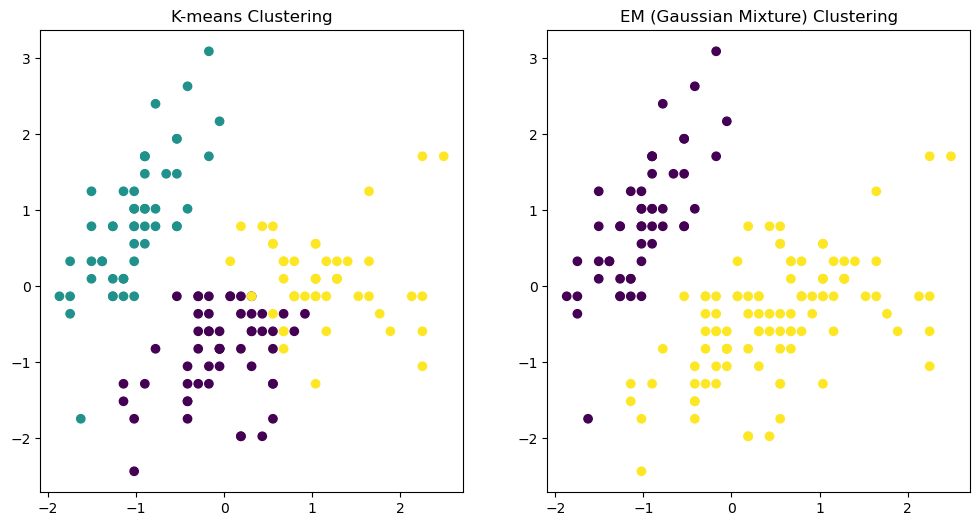

K-means - Silhouette Score: 0.45994823920518646
EM (Gaussian Mixture) - Silhouette Score: 0.5817500491982808
K-means - Davies-Bouldin Index: 0.8335949464754334
EM (Gaussian Mixture) - Davies-Bouldin Index: 0.5933126905762434


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score

data = pd.read_csv('data.csv')

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
data_array = data_scaled

kmeans = KMeans(n_clusters=3, random_state=0)
kmeans_clusters = kmeans.fit_predict(data_array)

gmm = GaussianMixture(n_components=2, random_state=0)
gmm_clusters = gmm.fit(data_array).predict(data_array)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(data_array[:, 0], data_array[:, 1], c=kmeans_clusters, cmap='viridis')
plt.title('K-means Clustering')
plt.subplot(1, 2, 2)
plt.scatter(data_array[:, 0], data_array[:, 1], c=gmm_clusters, cmap='viridis')
plt.title('EM (Gaussian Mixture) Clustering')
plt.show()

kmeans_silhouette = silhouette_score(data_array, kmeans_clusters)
kmeans_db = davies_bouldin_score(data_array, kmeans_clusters)

gmm_silhouette = silhouette_score(data_array, gmm_clusters)
gmm_db = davies_bouldin_score(data_array, gmm_clusters)

print("K-means - Silhouette Score:", kmeans_silhouette)
print("EM (Gaussian Mixture) - Silhouette Score:", gmm_silhouette)
print("K-means - Davies-Bouldin Index:", kmeans_db)
print("EM (Gaussian Mixture) - Davies-Bouldin Index:", gmm_db)

# Program 3

## Implement the non-parametric Locally Weighted Regression algorithm in order to fit data points. Select appropriate data set for your experiment and draw graphs

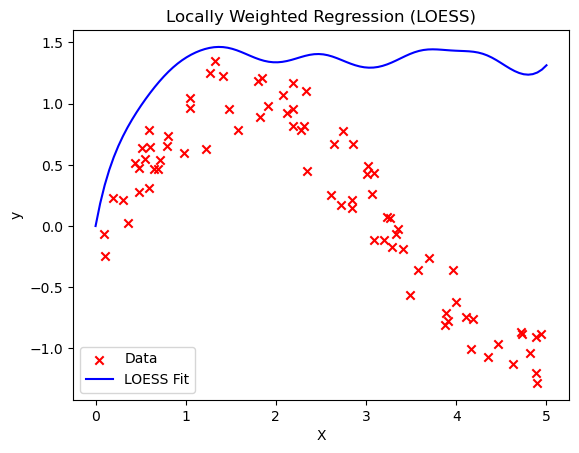

In [4]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y += 0.2 * np.random.randn(80)

def loess(x, X, y, tau=0.5):
    num_samples = len(X)
    weights = np.exp(-((X - x) ** 2) / (2 * tau ** 2))
    weighted_X = X * weights
    weighted_y = y * weights
    theta = np.sum(weighted_X) / np.sum(weighted_X ** 2)
    y_hat = theta * x
    return y_hat

x_pred = np.linspace(0, 5, 100) 
tau = 0.5 

y_pred = [loess(x, X, y, tau) for x in x_pred]

plt.scatter(X, y, c='r', marker='x', label='Data')
plt.plot(x_pred, y_pred, c='b', label='LOESS Fit')
plt.legend()
plt.title('Locally Weighted Regression (LOESS)')
plt.xlabel('X')
plt.ylabel('y')
plt.show()


# Program 4

## Build an Artificial Neural Network by implementing the Backpropagation algorithm and test the same using appropriate data sets

In [5]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

i_s, hs, os = 2, 4, 1

lr, epochs = 0.1, 10000

np.random.seed(1)
hw = np.random.uniform(size=(i_s, hs))
hb = np.zeros((1, hs))
ow = np.random.uniform(size=(hs, os))
ob = np.zeros((1, os))

for epoch in range(epochs):
    # Forward pass
    hlo = sigmoid(np.dot(X, hw) + hb)
    olo = sigmoid(np.dot(hlo, ow) + ob)

    # Backpropagation
    d_output = (y - olo) * sigmoid_derivative(olo)
    d_hidden = d_output.dot(ow.T) * sigmoid_derivative(hlo)

    # Update weights and biases
    ow += hlo.T.dot(d_output) * lr
    ob += np.sum(d_output, axis=0, keepdims=True) * lr
    hw += X.T.dot(d_hidden) * lr
    hb += np.sum(d_hidden, axis=0, keepdims=True) * lr

# Testing
hlo = sigmoid(np.dot(X, hw) + hb)
olo = sigmoid(np.dot(hlo, ow) + ob)

print("Predicted Output:")
print(olo)

Predicted Output:
[[0.07867958]
 [0.92547958]
 [0.92718494]
 [0.07972985]]


# Program 5

## Demonstrate Genetic Algorithm by taking a suitable data for any simple application

### The target string is "HELLO, WORLD!" and we want to evolve a population of random strings to eventually produce this target string.

In [6]:
import random
import string

target = "HELLO, WORLD!"

ps = 200
mr = 0.01

def generate_random_string(length):
    return ''.join(random.choice(string.printable) for _ in range(length))

def calculate_fitness(string):
    return sum(1 for a, b in zip(string, target) if a == b)

def select(population):
    total_fitness = sum(calculate_fitness(ind) for ind in population)
    r = random.uniform(0, total_fitness)
    current_sum = 0
    for ind in population:
        current_sum += calculate_fitness(ind)
        if current_sum >= r:
            return ind

def create_new_generation(population):
    new_population = []
    for _ in range(ps):
        parent1 = select(population)
        parent2 = select(population)
        split_point = random.randint(1, len(target) - 1)
        child = parent1[:split_point] + parent2[split_point:]
        for i in range(len(child)):
            if random.random() < mr:
                child = child[:i] + random.choice(string.printable) + child[i+1:]
        new_population.append(child)
    return new_population

population = [generate_random_string(len(target)) for _ in range(ps)]
generation = 1

while True:
    population.sort(key=lambda x: -calculate_fitness(x))
    best_individual = population[0]
    print(f"Generation {generation}: {best_individual}")
    if best_individual == target:
        break
    population = create_new_generation(population)
    generation += 1

Generation 1: DXx=W7{WOW<x"
Generation 2: HP$cfy{WOW<x"
Generation 3: ,>LE2|{WOZbp!
Generation 4: ;=0,&WORLv'
Generation 5: ;=0,&WORLv!
Generation 6: H	HO,&WORLv!
Generation 7: H	HO,&WORLv!
Generation 8: H	ohO,{WORLv!
Generation 9: H'ohO,{WORLv!
Generation 10: H:\=,&WORLv!
Generation 11: H>LhO,{WORLxL
Generation 12: H:La.,{WORLv!
Generation 13: H>L0,&WORL:!
Generation 14: HXLI.,-WORLv!
Generation 15: HWL0O,{WORL*!
Generation 16: H>LIO,-WORLx!
Generation 17: HXLhO,{WORLv!
Generation 18: HXLhO,&WORLD!
Generation 19: HXLhO,&WORLD!
Generation 20: HXLhO,{WORLx!
Generation 21: H>L0O,{WORLD!
Generation 22: H'L=O,{WORLD!
Generation 23: H>L0O,EWORLD!
Generation 24: H>LhO,{WORLD!
Generation 25: H>L0O, WdRLD!
Generation 26: H>LhO,{WORLD!
Generation 27: H
LhO,{WORLD!
Generation 28: H'L=O,{WORLD!
Generation 29: H>LhO,{WORLD!
Generation 30: H>LhO,{WORLD!
Generation 31: H'L0O,^WORLD!
Generation 32: H>L5O, WORL*!
Generation 33: H'LIO, WORdD!
Generation 34: H'L O,{WORLD!
Generation 35: H
L O,{W

# Program 6

## Demonstrate Q learning algorithm with suitable assumption for a problem statement

### Assumed problem statement : a 2D grid world where an agent needs to find the shortest path to a goal while avoiding obstacles.

In [7]:
import numpy as np

# Define the environment and Q-table
# 0: empty cell, 1: obstacle, 2: goal
env = np.array([[0, 0, 0, 1, 0], [0, 1, 0, 1, 0], [0, 1, 0, 1, 0], [0, 0, 0, 1, 2]])
Q = np.zeros((np.prod(env.shape), 4))

# Define hyperparameters
lr = 0.8
dr = 0.95
ep = 0.2
ne = 1000

# Define A
A = [(-1, 0), (1, 0), (0, -1), (0, 1)]

# Perform Q-learning
for _ in range(ne):
    S = (0, 0)
    while env[S] != 2:
        action = np.random.choice(4) if np.random.uniform(0, 1) < ep else np.argmax(Q[S[0]*env.shape[1]+S[1]])
        new_S = (max(min(S[0]+A[action][0], env.shape[0]-1), 0), max(min(S[1]+A[action][1], env.shape[1]-1), 0))
        reward = -1 if env[new_S] == 1 else (10 if env[new_S] == 2 else 0)
        Q[S[0]*env.shape[1]+S[1]][action] += lr * (reward + dr*np.max(Q[new_S[0]*env.shape[1]+new_S[1]]) - 
                                 Q[S[0]*env.shape[1]+S[1]][action])
        S = new_S

# Find the optimal path
S = (0, 0)
optimal_path = [S]
while env[S] != 2:
    action = np.argmax(Q[S[0]*env.shape[1]+S[1]])
    S = (max(min(S[0]+A[action][0], env.shape[0]-1), 0), max(min(S[1]+A[action][1], env.shape[1]-1), 0))
    optimal_path.append(S)

print("Optimal Path:", optimal_path)

Optimal Path: [(0, 0), (0, 1), (0, 2), (1, 2), (2, 2), (3, 2), (3, 3), (3, 4)]


In [8]:
import numpy as np

# Define the environment (2D grid world)
# 0: empty cell, 1: obstacle, 2: goal
env = np.array([
    [0, 0, 0, 1, 0],
    [0, 1, 0, 1, 0],
    [0, 1, 0, 1, 0],
    [0, 0, 0, 1, 2]
])

# Define Q-table (state-action values)
num_states = np.prod(env.shape)
num_actions = 4  # Up, Down, Left, Right
Q = np.zeros((num_states, num_actions))

# Define hyperparameters
learning_rate = 0.8
discount_factor = 0.95
exploration_prob = 0.2
num_episodes = 1000

# Convert 2D grid to 1D state representation
def state_to_index(state):
    return state[0] * env.shape[1] + state[1]

# Perform Q-learning
for episode in range(num_episodes):
    state = (0, 0)  # Start from the top-left corner
    done = False

    while not done:
        if np.random.uniform(0, 1) < exploration_prob:
            action = np.random.choice(num_actions)  # Exploration
        else:
            action = np.argmax(Q[state_to_index(state)])  # Exploitation

        new_state = state
        if action == 0:  # Up
            new_state = (max(state[0] - 1, 0), state[1])
        elif action == 1:  # Down
            new_state = (min(state[0] + 1, env.shape[0] - 1), state[1])
        elif action == 2:  # Left
            new_state = (state[0], max(state[1] - 1, 0))
        elif action == 3:  # Right
            new_state = (state[0], min(state[1] + 1, env.shape[1] - 1))

        if env[new_state] == 1:
            reward = -1  # Penalty for hitting an obstacle
        elif env[new_state] == 2:
            reward = 10  # Reward for reaching the goal
            done = True
        else:
            reward = 0  # No immediate reward for other states

        Q[state_to_index(state)][action] = Q[state_to_index(state)][action] + learning_rate * (
            reward + discount_factor * np.max(Q[state_to_index(new_state)]) - Q[state_to_index(state)][action])

        state = new_state

# Find the optimal path
state = (0, 0)
optimal_path = [state]
while state != (3, 4):  # Goal state
    action = np.argmax(Q[state_to_index(state)])
    if action == 0:
        state = (max(state[0] - 1, 0), state[1])
    elif action == 1:
        state = (min(state[0] + 1, env.shape[0] - 1), state[1])
    elif action == 2:
        state = (state[0], max(state[1] - 1, 0))
    elif action == 3:
        state = (state[0], min(state[1] + 1, env.shape[1] - 1))
    optimal_path.append(state)

print("Optimal Path:")
for row in env:
    print(row)

print("Q-table:")
print(Q)

print("Optimal Path:")
for state in optimal_path:
    print(state)

Optimal Path:
[0 0 0 1 0]
[0 1 0 1 0]
[0 1 0 1 0]
[0 0 0 1 2]
Q-table:
[[ 6.24828107  5.93586702  6.24828107  6.57713797]
 [ 6.57713797  5.92330312  6.24828107  6.92330312]
 [ 6.92330312  7.2876875   6.57713797  5.90280122]
 [ 5.5669007   7.56487222  6.92330312  5.24785978]
 [ 0.          3.99453762  6.03611306  4.20767362]
 [ 6.24828107  5.83786419  4.71928994  5.639512  ]
 [ 6.57550896  6.28540414  5.93362881  7.2876875 ]
 [ 6.92330312  7.67125     5.92330312  7.57374377]
 [ 5.57483254  8.025       7.2858825   9.025     ]
 [ 5.28435301  9.5         5.86597166  8.17701457]
 [ 5.89246092  0.          2.45643476  6.28765474]
 [ 5.92010564  7.18477485  5.94548638  7.67125   ]
 [ 7.2876875   8.075       6.2876875   8.025     ]
 [ 7.53471999  8.5         7.67124696  9.5       ]
 [ 9.025      10.          8.025       9.5       ]
 [ 5.73362397  0.          0.          0.        ]
 [ 6.18278059  0.          3.6294027   8.075     ]
 [ 7.67125     8.075       7.67125     8.5       ]
 [ 8.025   